In [2]:
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, kde, kstest, stats
from numpy import inf
import math




%matplotlib inline
sns.set()
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)
data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Gmail(0-15)0removed.csv"
data = pd.read_csv(data_path)
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\'

In [3]:
data.head()

,time,1day_active_users,1day_imap_users,1day_pop_users,1day_webmail_users,30day_active_users,30day_imap_users,30day_pop_users,30day_webmail_users,7day_active_users,7day_imap_users,7day_pop_users,7day_webmail_users,emails_exchanged,emails_received,emails_sent
0,2015-03-23 00:00:00-04:00,19687.0,10463.0,214.0,12300.0,23980.0,12339.0,265.0,21780.0,22329.0,11508.0,234.0,18220.0,527020.0,474483.0,52537.0
1,2015-03-24 00:00:00-04:00,19437.0,10510.0,214.0,12247.0,24025.0,12336.0,264.0,21834.0,22364.0,11519.0,236.0,18324.0,427165.0,378195.0,48970.0
2,2015-03-25 00:00:00-04:00,19520.0,10453.0,212.0,12158.0,24045.0,12357.0,262.0,21862.0,22383.0,11527.0,236.0,18397.0,472306.0,423666.0,48640.0
3,2015-03-26 00:00:00-04:00,19335.0,10496.0,213.0,11713.0,24074.0,12365.0,263.0,21897.0,22370.0,11546.0,224.0,18412.0,451496.0,405663.0,45833.0
4,2015-03-27 00:00:00-04:00,18768.0,10419.0,204.0,10102.0,24079.0,12340.0,262.0,21890.0,22395.0,11558.0,222.0,18414.0,379394.0,342226.0,37168.0


In [4]:
data['time'] = pd.to_datetime(data['time'],utc=True)
#data['time']



In [5]:
data.set_index('time', inplace=True)


In [6]:
data.index.dtype

datetime64[ns, UTC]

In [7]:
data.head()

,1day_active_users,1day_imap_users,1day_pop_users,1day_webmail_users,30day_active_users,30day_imap_users,30day_pop_users,30day_webmail_users,7day_active_users,7day_imap_users,7day_pop_users,7day_webmail_users,emails_exchanged,emails_received,emails_sent
time,,,,,,,,,,,,,,,
2015-03-23 04:00:00+00:00,19687.0,10463.0,214.0,12300.0,23980.0,12339.0,265.0,21780.0,22329.0,11508.0,234.0,18220.0,527020.0,474483.0,52537.0
2015-03-24 04:00:00+00:00,19437.0,10510.0,214.0,12247.0,24025.0,12336.0,264.0,21834.0,22364.0,11519.0,236.0,18324.0,427165.0,378195.0,48970.0
2015-03-25 04:00:00+00:00,19520.0,10453.0,212.0,12158.0,24045.0,12357.0,262.0,21862.0,22383.0,11527.0,236.0,18397.0,472306.0,423666.0,48640.0
2015-03-26 04:00:00+00:00,19335.0,10496.0,213.0,11713.0,24074.0,12365.0,263.0,21897.0,22370.0,11546.0,224.0,18412.0,451496.0,405663.0,45833.0
2015-03-27 04:00:00+00:00,18768.0,10419.0,204.0,10102.0,24079.0,12340.0,262.0,21890.0,22395.0,11558.0,222.0,18414.0,379394.0,342226.0,37168.0


In [8]:
data.describe()

,1day_active_users,1day_imap_users,1day_pop_users,1day_webmail_users,30day_active_users,30day_imap_users,30day_pop_users,30day_webmail_users,7day_active_users,7day_imap_users,7day_pop_users,7day_webmail_users,emails_exchanged,emails_received,emails_sent
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,17342.083400,10121.396550,59.434528,9070.432529,26556.905629,11853.737798,77.163861,22606.364120,23960.306198,11077.968924,65.897961,17195.628931,308218.717978,280596.000084,27622.717894
std,3303.781114,698.554539,50.031400,3053.649387,1047.121334,886.162588,63.755714,1522.919765,1230.787918,806.474756,55.384075,2763.132213,130546.489327,115245.518166,15944.424254
min,7235.000000,0.000000,0.000000,0.000000,23980.000000,0.000000,0.000000,0.000000,18413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15235.000000,9822.000000,28.000000,6889.000000,25812.000000,11369.000000,39.000000,21936.000000,23197.000000,10743.000000,32.000000,14774.000000,186676.000000,175658.000000,11979.000000
50%,17354.000000,10127.000000,39.000000,8665.000000,26465.000000,11904.000000,49.000000,22848.000000,24047.000000,11084.000000,42.000000,18221.000000,294128.000000,267113.000000,28107.000000
75%,20192.000000,10483.000000,62.000000,11908.000000,27314.000000,12324.000000,84.000000,23568.000000,24830.000000,11592.000000,69.000000,19266.000000,429549.000000,383953.000000,43534.000000
max,23585.000000,11849.000000,231.000000,18709.000000,29284.000000,13843.000000,268.000000,25709.000000,26744.000000,12853.000000,241.000000,22282.000000,703091.000000,648823.000000,56768.000000


Text(0.5, 0, 'Year')

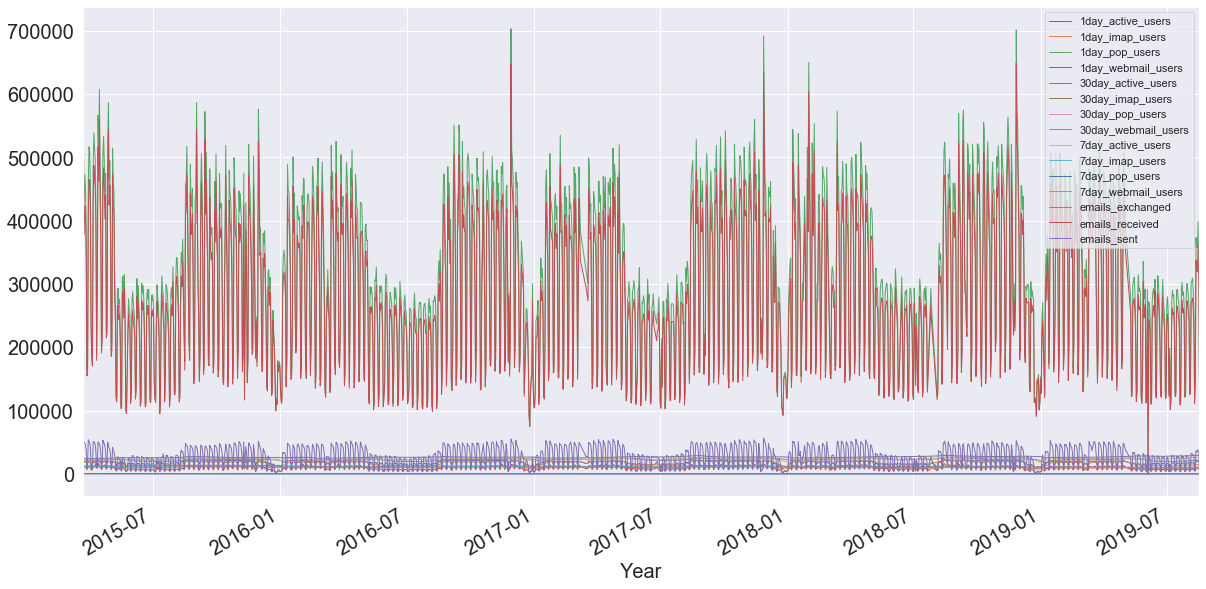

In [9]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [10]:
#odu = data['1day_active_users'].median(skipna=True)
#data=data.replace({'1day_active_users': {0: odu}}) 
#data = data[(data.T != 0).any()]

In [11]:
data

,1day_active_users,1day_imap_users,1day_pop_users,1day_webmail_users,30day_active_users,30day_imap_users,30day_pop_users,30day_webmail_users,7day_active_users,7day_imap_users,7day_pop_users,7day_webmail_users,emails_exchanged,emails_received,emails_sent
time,,,,,,,,,,,,,,,
2015-03-23 04:00:00+00:00,19687.000000,10463.000000,214.000000,12300.000000,23980.000000,12339.000000,265.000000,21780.000000,22329.0000,11508.00000,234.000000,18220.000000,527020.000000,474483.000000,52537.000000
2015-03-24 04:00:00+00:00,19437.000000,10510.000000,214.000000,12247.000000,24025.000000,12336.000000,264.000000,21834.000000,22364.0000,11519.00000,236.000000,18324.000000,427165.000000,378195.000000,48970.000000
2015-03-25 04:00:00+00:00,19520.000000,10453.000000,212.000000,12158.000000,24045.000000,12357.000000,262.000000,21862.000000,22383.0000,11527.00000,236.000000,18397.000000,472306.000000,423666.000000,48640.000000
2015-03-26 04:00:00+00:00,19335.000000,10496.000000,213.000000,11713.000000,24074.000000,12365.000000,263.000000,21897.000000,22370.0000,11546.00000,224.000000,18412.000000,451496.000000,405663.000000,45833.000000
2015-03-27 04:00:00+00:00,18768.000000,10419.000000,204.000000,10102.000000,24079.000000,12340.000000,262.000000,21890.000000,22395.0000,11558.00000,222.000000,18414.000000,379394.000000,342226.000000,37168.000000
2015-03-28 04:00:00+00:00,16261.000000,10257.000000,201.000000,6754.000000,24091.000000,12331.000000,262.000000,21875.000000,22421.0000,11565.00000,222.000000,18441.000000,165700.000000,154766.000000,10934.000000
2015-03-29 04:00:00+00:00,16400.000000,10312.000000,205.000000,8833.000000,24046.000000,12318.000000,264.000000,21790.000000,22407.0000,11567.00000,225.000000,18442.000000,179508.000000,162389.000000,17119.000000
2015-03-30 04:00:00+00:00,19500.000000,10506.000000,213.000000,12713.000000,24083.000000,12325.000000,264.000000,21856.000000,22408.0000,11563.00000,226.000000,18531.000000,461750.000000,407661.000000,54089.000000
2015-03-31 04:00:00+00:00,19332.000000,10496.000000,214.000000,12483.000000,24102.000000,12330.000000,264.000000,21891.000000,22410.0000,11567.00000,228.000000,18494.000000,516636.000000,465110.000000,51526.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142A64B62E8>,
      dtype=object)

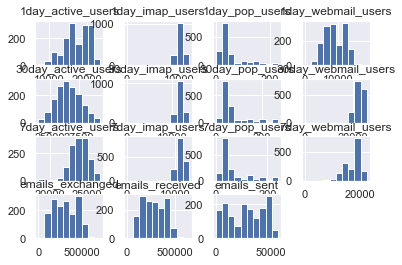

In [12]:
data.hist()

Text(0.5, 0, 'Year')

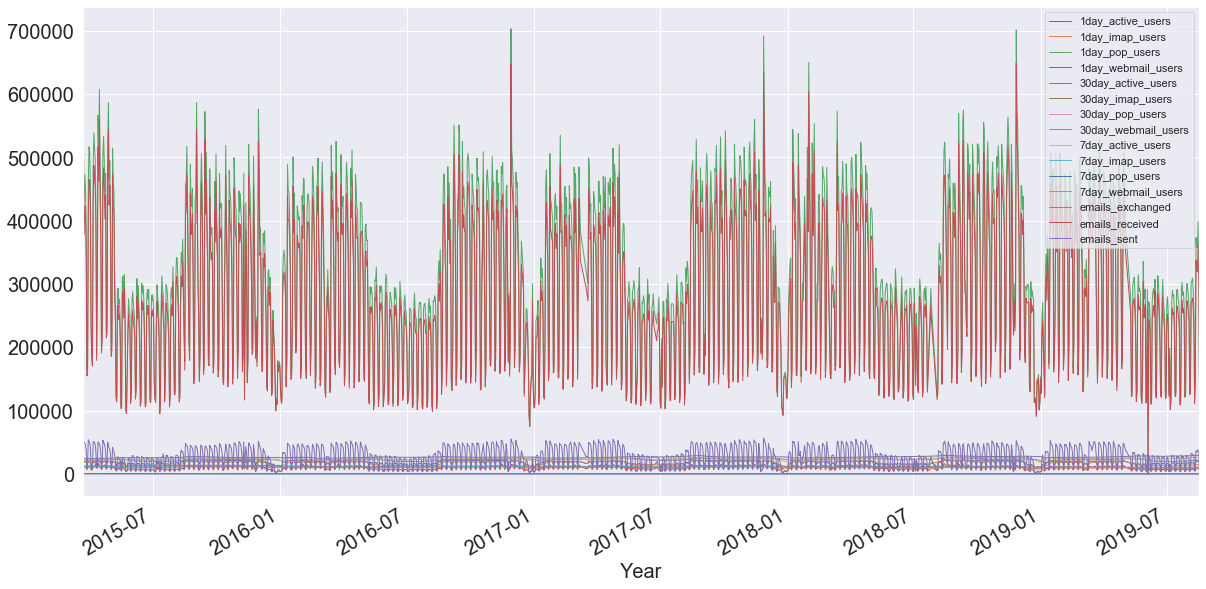

In [13]:
data.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('Year', fontsize=20)

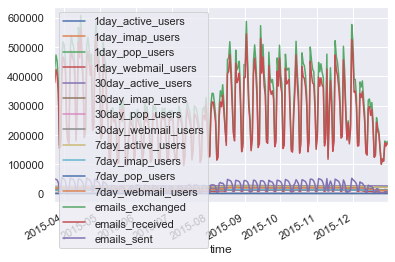

In [14]:
data.loc['2015'].plot()

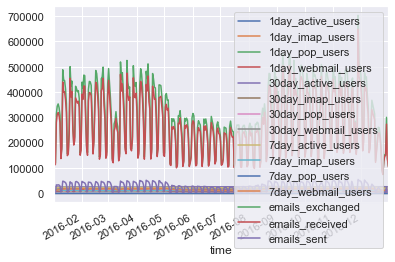

In [15]:
data.loc['2016'].plot()

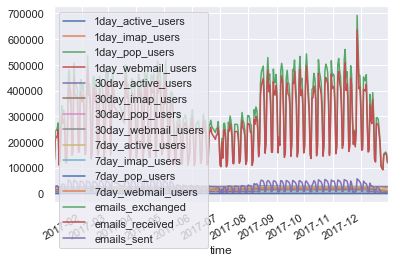

In [16]:
data.loc['2017'].plot()

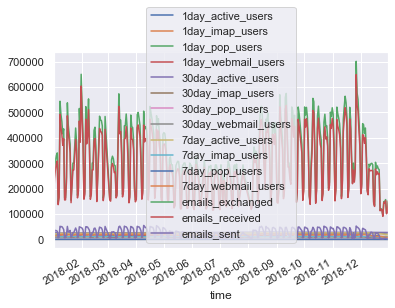

In [17]:
data.loc['2018'].plot()

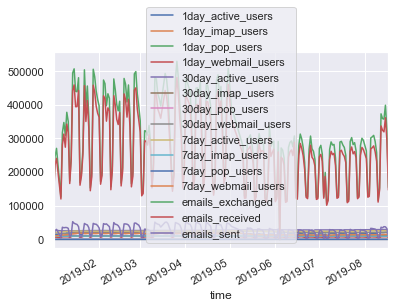

In [18]:
data.loc['2019'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000142A6E3ADA0>,
      dtype=object)

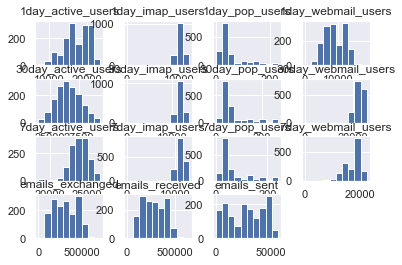

In [19]:
data.hist()

In [22]:
alpha = norm.fit(data['1day_active_users'])[0]
beta = norm.fit(data['1day_active_users'])[1]

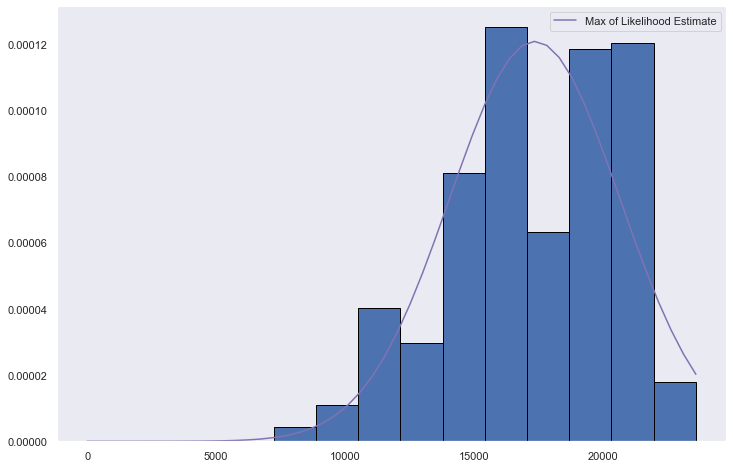

In [23]:
import numpy as np

odu = data['1day_active_users']
odu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, odu.max())
l1,=plt.plot(x, norm.pdf(x, alpha, beta), 'm-', label="Max of Likelihood Estimate")
plt.legend(handles=[l1])

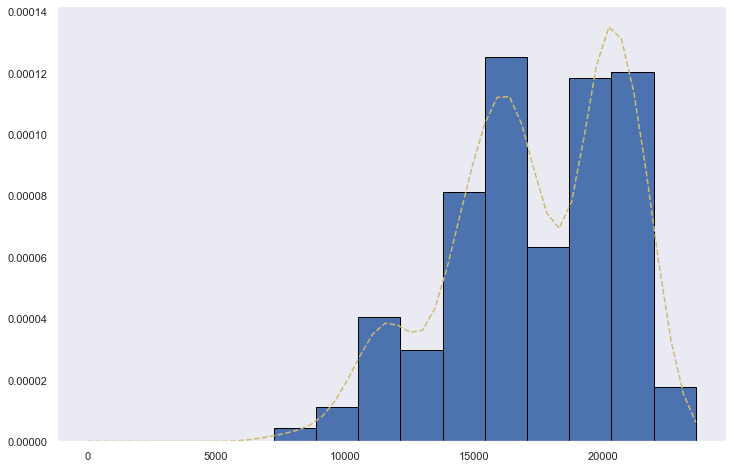

In [24]:

odu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, odu.max())
density = kde.gaussian_kde(odu, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

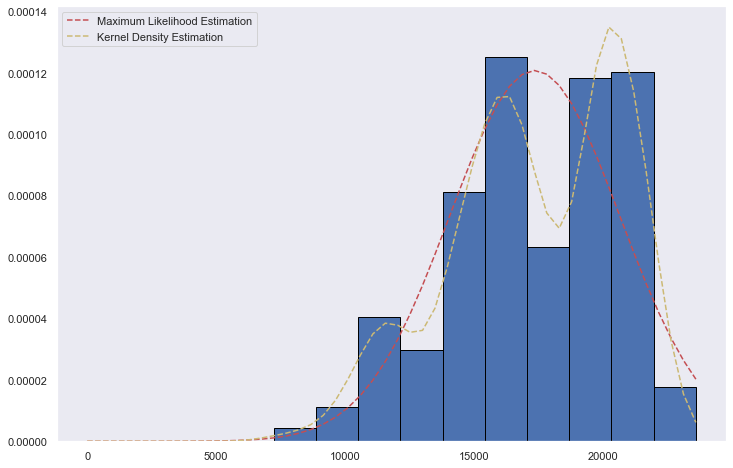

In [29]:
import numpy as np
odu.hist(normed=True, bins=10, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, odu.max())
density = kde.gaussian_kde(odu, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

#l1, = plt.plot(x, norm.pdf(x, alpha[-1], beta[-1]), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, alpha, beta), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [30]:
my_cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])


In [31]:
kstest(odu,my_cdf)

KstestResult(statistic=0.028242945302428435, pvalue=0.16686857161993301)

In [32]:
e = norm(alpha,beta)

In [33]:
kstest(odu, e.cdf)

KstestResult(statistic=0.11133223603089792, pvalue=3.9032020068459515e-17)

In [34]:
odu_size = odu.size
odu_mean = odu.mean()
z_critical = norm.ppf(q = 0.975)  # Get the z-critical value*
                        

odu_std = odu.std()  # Get the population standard deviation

margin_of_error = z_critical * (odu_std/math.sqrt(odu_size))

confidence_interval = (odu_mean - margin_of_error,
                       odu_mean + margin_of_error)  

print("Sample Mean:")
print(odu_mean)

print("Confidence interval:")
print(confidence_interval)

Sample Mean:
17342.083399852734
Confidence interval:
(17177.344896792172, 17506.821902913296)


In [39]:
odu.size

1545

In [40]:
data.size

23175

In [47]:
data.shape

(1545, 15)